In [1]:
!conda install -y gdown

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.13.4            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-5.1.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          36 KB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.13.4-pyhd8ed1a

In [2]:
 !gdown --id 1m95s8q2lGvNnG6m5JAzDidOdhlNL7Lxn

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1m95s8q2lGvNnG6m5JAzDidOdhlNL7Lxn
To: /kaggle/working/train.csv
100%|██████████████████████████████████████| 23.9M/23.9M [00:00<00:00, 85.1MB/s]


In [3]:
!gdown --id 1a4Xf_v7ROi-unasxmb5-08-Hr4amcHan

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1a4Xf_v7ROi-unasxmb5-08-Hr4amcHan
To: /kaggle/working/test.csv
100%|███████████████████████████████████████| 1.50M/1.50M [00:00<00:00, 149MB/s]


In [7]:
!gdown --id 1nCwQsQORexN2qyZqlYHNM_6QNm_T0zfC

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nCwQsQORexN2qyZqlYHNM_6QNm_T0zfC
To: /kaggle/working/preprocessed_train.csv
100%|███████████████████████████████████████| 17.1M/17.1M [00:00<00:00, 146MB/s]


In [22]:
!gdown --id 1Q8D38Pj0IZjF_Qo_QbFyJvb_9OGTGc5u

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q8D38Pj0IZjF_Qo_QbFyJvb_9OGTGc5u
To: /kaggle/working/lower_test.csv
100%|███████████████████████████████████████| 1.50M/1.50M [00:00<00:00, 124MB/s]


In [4]:
!gdown --id 1okkqaB5tKGmgh3RNkeyg_02wl9LF7BJE

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1okkqaB5tKGmgh3RNkeyg_02wl9LF7BJE
From (redirected): https://drive.google.com/uc?id=1okkqaB5tKGmgh3RNkeyg_02wl9LF7BJE&confirm=t&uuid=302654dc-9909-48f8-91d4-853b08849baf
To: /kaggle/working/forward1.pt
100%|████████████████████████████████████████| 132M/132M [00:02<00:00, 63.9MB/s]


In [5]:
!gdown --id 1Zc11tnkXojmgifYkr42U8t6bncq81-ok

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Zc11tnkXojmgifYkr42U8t6bncq81-ok
From (redirected): https://drive.google.com/uc?id=1Zc11tnkXojmgifYkr42U8t6bncq81-ok&confirm=t&uuid=5a8f7860-51c4-48b6-a48d-d124993fa3ff
To: /kaggle/working/backward1.pt
100%|████████████████████████████████████████| 132M/132M [00:02<00:00, 59.3MB/s]


In [37]:
# Import necessary libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import numpy as np
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Load data
df = pd.read_csv("/kaggle/working/preprocessed_train.csv")
corpus = df["Description"].fillna('')


# Create vocabulary and word2idx
words = set()
for sent in corpus:
    sent = sent.translate(str.maketrans('', '', string.punctuation)).lower()
    words.update([word for word in sent.split() if word.isalpha()])

# Ensure '<unk>' and '<pad>' are in your dictionary
word2idx = {word: i + 2 for i, word in enumerate(sorted(words))}  # Start indexing from 2
word2idx['<unk>'] = 1  # Unknown words
word2idx['<pad>'] = 0  # Padding token
vocab_size=len(word2idx)

In [38]:
vocab_size

52372

In [39]:
df = pd.read_csv('/kaggle/working/preprocessed_train.csv')
class_index = df['Class Index'] - 1  # convert classes from 1-4 to 0-3
descriptions = df['Description'].fillna('')

# Assume 'word2idx' is available from earlier
inputs = [torch.tensor([word2idx.get(word, word2idx['<unk>']) for word in sent.split()], dtype=torch.long) for sent in descriptions]
labels = torch.tensor(class_index.values, dtype=torch.long)

# Custom dataset
from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    texts, labels = zip(*batch)
    # Pad the sequences to have the same length
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=word2idx['<pad>'])
    labels = torch.stack(labels)  # Ensure labels are also properly formatted as a tensor
    return texts_padded, labels

# Assuming that your dataset and DataLoader are set up as follows:
class CustomDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

# DataLoader
dataset = CustomDataset(inputs, labels)
loader = DataLoader(dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)



In [40]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import pandas as pd
import numpy as np
from tqdm import tqdm

class ForwardLM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, dropout_prob):
        super(ForwardLM, self).__init__()
        self.embed_layer = nn.Embedding(vocab_size, embedding_dim)
        self.layer1 = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.layer2 = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embed_layer(x)
        x, (h1, c1) = self.layer1(x)
        x = self.dropout(x)
        x, (h2, c2) = self.layer2(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x, h2  # Return sequence output and last hidden state


class BackwardLM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, dropout_prob):
        super(BackwardLM, self).__init__()
        self.embed_layer = nn.Embedding(vocab_size, embedding_dim)
        self.layer1 = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.layer2 = nn.LSTM(hidden_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    
    def forward(self, x):
        x = self.embed_layer(x)
        x, (h1, c1) = self.layer1(x)
        x = self.dropout(x)
        x, (h2, c2) = self.layer2(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x, h2  # Return sequence output and last hidden state







In [52]:
class DownstreamModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes, num_layers, forwardLM, backwardLM, num_lam):
        super(DownstreamModel, self).__init__()
        self.forwardLM = forwardLM
        self.backwardLM = backwardLM
        self.layer = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.output = nn.Linear(hidden_dim, num_classes)
        self.softmax = nn.Softmax(dim=1)
        self.lambdas = nn.Parameter(torch.rand(num_lam))

    def forward(self, xf, xb):
        fout, fhidden = self.forwardLM(xf)  # Assume these return the output and the last hidden state
        bout, bhidden = self.backwardLM(xb)

        # Ensure hidden states are properly extracted if not, change indices accordingly
        fhidden = fhidden[-1]  # Assuming fhidden is the last layer's hidden state
        bhidden = bhidden[-1]  # Assuming bhidden is the last layer's hidden state
        combined = torch.cat((fhidden, bhidden), dim=1)
        out, _ = self.layer(combined)  # Ensure combined has shape [batch_size, seq_len, features]
        out = self.output(out.squeeze(1))  # Adjust this depending on whether you have a seq_len dimension

        return self.softmax(out)

In [58]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize language models
forward_lm = ForwardLM(vocab_size, 300, 300, 0.5).to(device)
backward_lm = BackwardLM(vocab_size, 300, 300, 0.5).to(device)

# Load pretrained weights
forward_lm.load_state_dict(torch.load('/kaggle/working/forward1.pt'))
backward_lm.load_state_dict(torch.load('/kaggle/working/backward1.pt'))

# Freeze the language models to prevent further training
for param in forward_lm.parameters():
    param.requires_grad = True
for param in backward_lm.parameters():
    param.requires_grad = True

# Setup the downstream model
downstream_model = DownstreamModel(600, 300, 4, 1, forward_lm, backward_lm, 3).to(device)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(downstream_model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
downstream_model.train()
num_epochs = 5

for epoch in range(num_epochs):
    total_loss = 0
    for texts, labels in tqdm(loader):
        texts, labels = texts.to(device), labels.to(device)

        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        logits = downstream_model(texts, torch.flip(texts, dims=[1]))  # flipping for backward model input

        # Compute loss
        loss = criterion(logits, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Logging the losses
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(loader)}')


100%|██████████| 1875/1875 [01:51<00:00, 16.81it/s]


Epoch 1/5, Loss: 0.9149638624191284


100%|██████████| 1875/1875 [01:51<00:00, 16.74it/s]


Epoch 2/5, Loss: 0.8588846602757771


100%|██████████| 1875/1875 [01:52<00:00, 16.68it/s]


Epoch 3/5, Loss: 0.8419947058677674


100%|██████████| 1875/1875 [01:51<00:00, 16.87it/s]


Epoch 4/5, Loss: 0.8325658264795939


100%|██████████| 1875/1875 [01:51<00:00, 16.81it/s]

Epoch 5/5, Loss: 0.8234895880381267


In [59]:
print(downstream_model.lambdas)

Parameter containing:
tensor([0.4487, 0.1411, 0.8792], device='cuda:0', requires_grad=True)


In [60]:
# Save the trained model
model_path = '/kaggle/working/classifier.pt'
torch.save(downstream_model.state_dict(), model_path)

In [61]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the test data
df_test = pd.read_csv('/kaggle/working/lower_test.csv')
class_index_test = df_test['Class Index'] - 1  # Adjust class index as necessary
descriptions_test = df_test['Description'].fillna('')

# Prepare inputs and labels for the test data
test_inputs = [torch.tensor([word2idx.get(word, word2idx['<unk>']) for word in sent.split()], dtype=torch.long) for sent in descriptions_test]
test_labels = torch.tensor(class_index_test.values, dtype=torch.long)

# DataLoader for test data
def collate_fn(batch):
    texts, labels = zip(*batch)
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=word2idx['<pad>'])
    labels = torch.tensor(labels, dtype=torch.long)  # Ensure labels are properly formatted
    return texts_padded, labels

test_dataset = CustomDataset(test_inputs, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)


In [56]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the test data
df_test = pd.read_csv('/kaggle/working/preprocessed_train.csv')
class_index_test = df_test['Class Index'] - 1  # Adjust class index as necessary
descriptions_test = df_test['Description'].fillna('')

# Prepare inputs and labels for the test data
test_inputs = [torch.tensor([word2idx.get(word, word2idx['<unk>']) for word in sent.split()], dtype=torch.long) for sent in descriptions_test]
test_labels = torch.tensor(class_index_test.values, dtype=torch.long)

# DataLoader for test data
def collate_fn(batch):
    texts, labels = zip(*batch)
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=word2idx['<pad>'])
    labels = torch.tensor(labels, dtype=torch.long)  # Ensure labels are properly formatted
    return texts_padded, labels

test_dataset = CustomDataset(test_inputs, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)

100%|██████████| 119/119 [00:06<00:00, 17.47it/s]


Accuracy: 0.8005263157894736
Precision: 0.8099540865900984
Recall: 0.8005263157894738
F1 Score: 0.7991750795839305


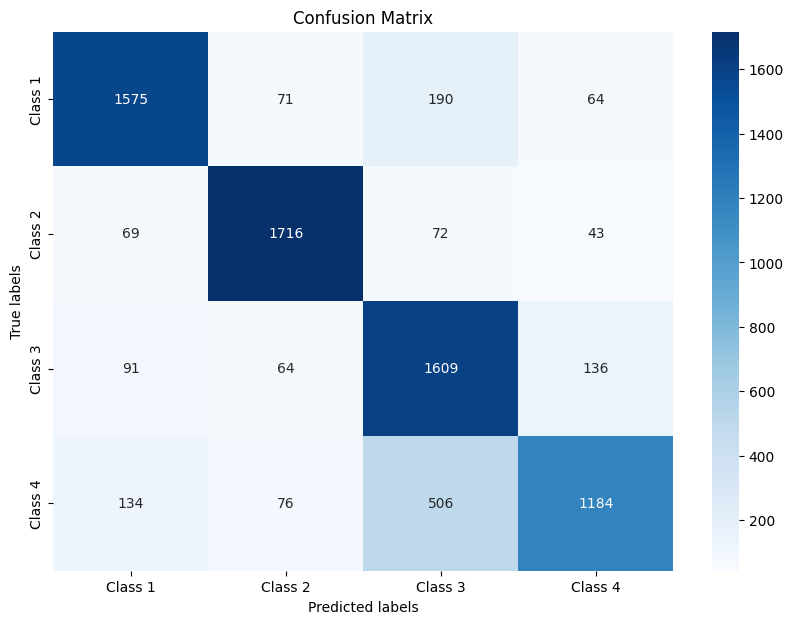

In [62]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'downstream_model' and 'test_loader' are already defined and properly set up
downstream_model.to(device)
downstream_model.eval()

# Evaluate the model
predicted_labels = []
true_labels = []

with torch.no_grad():
    for texts, labels in tqdm(test_loader):
        texts, labels = texts.to(device), labels.to(device)
        outputs = downstream_model(texts, torch.flip(texts, dims=[1]))  # Assuming model takes normal and flipped inputs
        _, predicted = torch.max(outputs.data, 1)
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy and other metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
